![title](keras.png)

![title](Chollet.png)

# What is Keras?

Keras is a high-level neural networks API, written in Python and capable of running on top of __TensorFlow__, __CNTK__, or __Theano__. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

Use Keras if you need a deep learning library that:

+ Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
+ Supports both convolutional networks and recurrent networks, as well as combinations of the two.
+ Runs seamlessly on CPU and GPU.

Read the documentation at Keras.io.

Keras is compatible with: Python 2.7-3.6.

# Multi-backend Keras and tf.keras

At this time, Keras users who use multi-backend Keras with the TensorFlow backend switch to __tf.keras__ in __TensorFlow 2.0__. tf.keras is better maintained and has better integration with TensorFlow features (eager execution, distribution support and other).

Keras 2.2.5 was the last release of Keras implementing the 2.2.* API. It was the last release to only support TensorFlow 1 (as well as Theano and CNTK).

The current release is Keras 2.3.0, which makes significant API changes and add support for TensorFlow 2.0. The 2.3.0 release will be the last major release of multi-backend Keras. Multi-backend Keras is superseded by tf.keras.

Bugs present in multi-backend Keras will only be fixed until April 2020 (as part of minor releases).

# Guiding principles

* __User friendliness__. Keras is an API designed for human beings, not machines. It puts user experience front and center. Keras follows best practices for reducing cognitive load: it offers consistent & simple APIs, it minimizes the number of user actions required for common use cases, and it provides clear and actionable feedback upon user error.

* __Modularity__. A model is understood as a sequence or a graph of standalone, fully configurable modules that can be plugged together with as few restrictions as possible. In particular, neural layers, cost functions, optimizers, initialization schemes, activation functions and regularization schemes are all standalone modules that you can combine to create new models.

* __Easy extensibility__. New modules are simple to add (as new classes and functions), and existing modules provide ample examples. To be able to easily create new modules allows for total expressiveness, making Keras suitable for advanced research.

* __Work with Python__. No separate models configuration files in a declarative format. Models are described in Python code, which is compact, easier to debug, and allows for ease of extensibility.

In [61]:
import tensorflow as tf
import numpy as np
import pandas as pd

df_train = pd.read_csv('disaster_tweets/train.csv')
df_train.count()

text      7613
target    7613
dtype: int64

In [62]:
df_train.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [63]:
print(df_train['text'][177])
print(df_train['target'][177])

Twelve feared killed in Pakistani air ambulance helicopter crash http://t.co/Xum8YLcb4Q
1


In [64]:
import re
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))

def clean_text(text_string):
    text_string = text_string.lower()
    text_string = re.sub(r'(http\S+|[^\s\w])+', ' ', str(text_string))
    text_string = ' '.join([i for i in text_string.split() if i not in stop])
    return text_string

In [65]:
df_train['text'] = df_train['text'].apply(clean_text)

In [66]:
print(df_train['text'][177])
print(df_train['target'][177])

twelve feared killed pakistani air ambulance helicopter crash
1


In [67]:
print(df_train['text'][96])
print(df_train['target'][96])

accident changed life help determine options financially support life care plans going treatment
0


In [70]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# cuts off sms text after 100 words
maxlen = 100
# considers only the top 10000 words in the dataset
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_train['text'].tolist())

sequences_train = tokenizer.texts_to_sequences(df_train['text'])

data_train = pad_sequences(sequences_train, maxlen=maxlen)
data_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0, 4410,  746,  164,   63, 1489, 4411,
         21], dtype=int32)

In [72]:
tokenizer.index_word

{1: 'û',
 2: 'like',
 3: 'amp',
 4: 'fire',
 5: 'get',
 6: 'new',
 7: 'via',
 8: '2',
 9: 'people',
 10: 'news',
 11: 'one',
 12: 'video',
 13: 'disaster',
 14: 'emergency',
 15: 'police',
 16: 'would',
 17: '3',
 18: 'u',
 19: 'body',
 20: 'still',
 21: 'us',
 22: 'california',
 23: 'storm',
 24: 'burning',
 25: 'crash',
 26: 'back',
 27: 'suicide',
 28: 'day',
 29: '1',
 30: 'time',
 31: 'man',
 32: 'got',
 33: 'know',
 34: 'rt',
 35: 'buildings',
 36: 'first',
 37: 'world',
 38: 'see',
 39: 'bomb',
 40: 'going',
 41: 'nuclear',
 42: 'two',
 43: 'fires',
 44: 'love',
 45: 'attack',
 46: 'today',
 47: 'dead',
 48: 'killed',
 49: 'year',
 50: 'youtube',
 51: 'go',
 52: '4',
 53: '5',
 54: 'car',
 55: 'gt',
 56: 'full',
 57: 'train',
 58: 'hiroshima',
 59: 'life',
 60: 'war',
 61: 'old',
 62: 'let',
 63: 'may',
 64: 'accident',
 65: 'good',
 66: 'families',
 67: 'say',
 68: 'think',
 69: '2015',
 70: 'watch',
 71: 'ûªs',
 72: 'many',
 73: 'last',
 74: 'could',
 75: 'home',
 76: 'way',
 

In [73]:
labels_train = np.asarray(df_train['target'].to_list())
labels_train

array([1, 1, 1, ..., 1, 1, 1])

In [74]:
word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')
print('Shape of data tensor:', data_train.shape)
print('Shape of label tensor:', labels_train.shape)

Found 16948 unique tokens.
Shape of data tensor: (7613, 100)
Shape of label tensor: (7613,)


In [ ]:
# TODO: CREATE scheme

In [76]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(maxlen,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 16)                1616      
_________________________________________________________________
dense_18 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 17        
Total params: 1,905
Trainable params: 1,905
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data_train, labels_train, stratify=labels_train, test_size=0.10)

In [79]:
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(
            'disaster_tweets.h5', monitor='val_loss', verbose=1, save_best_only=True
        )
    ]
)

Train on 6851 samples, validate on 762 samples
Epoch 1/10
5504/6851 [=======================>......] - ETA: 0s - loss: 121.3648 - accuracy: 0.5291
Epoch 00001: val_loss improved from inf to 52.36407, saving model to disaster_tweets.h5
6851/6851 [==============================] - 1s 93us/sample - loss: 109.4320 - accuracy: 0.5294 - val_loss: 52.3641 - val_accuracy: 0.5184
Epoch 2/10
5632/6851 [=======================>......] - ETA: 0s - loss: 43.3872 - accuracy: 0.5307
Epoch 00002: val_loss improved from 52.36407 to 29.41224, saving model to disaster_tweets.h5
6851/6851 [==============================] - 0s 24us/sample - loss: 42.0680 - accuracy: 0.5300 - val_loss: 29.4122 - val_accuracy: 0.5354
Epoch 3/10
5376/6851 [======================>.......] - ETA: 0s - loss: 27.4225 - accuracy: 0.5432
Epoch 00003: val_loss improved from 29.41224 to 25.72820, saving model to disaster_tweets.h5
6851/6851 [==============================] - 0s 24us/sample - loss: 26.7892 - accuracy: 0.5428 - val_los

In [80]:
# Another Schem of Bidirectional RNN

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional

model = models.Sequential()
model.add(layers.Embedding(max_words, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(
            'disaster_tweets.h5', monitor='val_loss', verbose=1, save_best_only=True
        )
    ]
)

Train on 6851 samples, validate on 762 samples
Epoch 1/10
6656/6851 [============================>.] - ETA: 0s - loss: 0.6489 - accuracy: 0.6203
Epoch 00001: val_loss improved from inf to 0.59385, saving model to disaster_tweets.h5
6851/6851 [==============================] - 4s 644us/sample - loss: 0.6462 - accuracy: 0.6246 - val_loss: 0.5938 - val_accuracy: 0.7270
Epoch 2/10
6656/6851 [============================>.] - ETA: 0s - loss: 0.4914 - accuracy: 0.8005
Epoch 00002: val_loss improved from 0.59385 to 0.47115, saving model to disaster_tweets.h5
6851/6851 [==============================] - 1s 172us/sample - loss: 0.4913 - accuracy: 0.8000 - val_loss: 0.4712 - val_accuracy: 0.7927
Epoch 3/10
6656/6851 [============================>.] - ETA: 0s - loss: 0.3849 - accuracy: 0.8403
Epoch 00003: val_loss improved from 0.47115 to 0.44708, saving model to disaster_tweets.h5
6851/6851 [==============================] - 1s 173us/sample - loss: 0.3820 - accuracy: 0.8419 - val_loss: 0.4471 - 

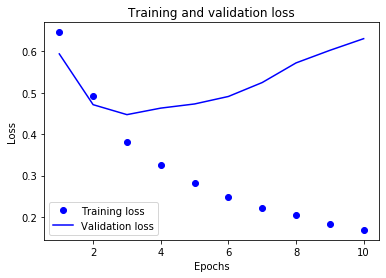

In [83]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

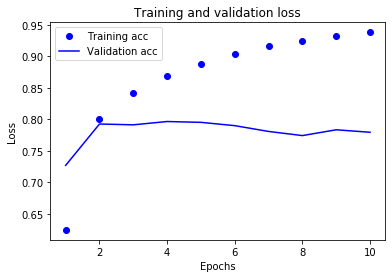

In [84]:
plt.clf()

history_dict = history.history
acc_values = history_dict['accuracy']
acc_loss_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, acc_loss_values, 'b', label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [85]:
results = model.evaluate(x_val, y_val, verbose=2)

762/1 - 0s - loss: 0.7633 - accuracy: 0.7795


In [86]:
from tensorflow import keras

load_model = keras.models.load_model('disaster_tweets.h5')

In [54]:
def predict_disaster(disaster_text):
    disaster_text = clean_text(disaster_text)
    sequences = np.array(tokenizer.texts_to_sequences([disaster_text]))
    data = pad_sequences(sequences, maxlen=maxlen)
    predict = load_model.predict(data)
    return predict[0][0]

In [87]:
predict_disaster("Australia is being ravaged by the worst wildfires seen in decades, with large swaths of the country devastated since the fire season began in late July.")

0.9037791

In [93]:
predict_disaster("Heartbreaking! Medical workers fighting the #coronavirus on the front line in Wuhan fell asleep without taking off their protective suits. Many of them have been working nonstop and could only sleep for 2-3 hours a day.")

0.23810622

In [89]:
predict_disaster("I love my mother")

0.11336366

In [90]:
predict_disaster("Today we learned about Keras.")

0.33565298

In [92]:
predict_disaster("Our predictions aren't that good.")

0.24722159

![title](robot.jpg)